In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
from torchvision.transforms import Lambda, Compose

transform = Compose([Lambda(lambda pil_image: np.asarray(pil_image))])

In [ ]:
trainset = CIFAR10(root='.', download=True, transform=transform)
testset = CIFAR10(root='.', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class OneLayerNet():
    def __init__(self, in_d, out_d):
        self.W = 0.001 * np.random.randn(in_d, out_d)
    
    def forward(self, X_batch):
        # X_batch shape (batch_size, in_d)
        return X_batch @ self.W

    def softmax(self, scores):
        # scores shape: (batch_size, out_d)
        shift = scores - np.max(scores, axis=1).reshape(-1, 1)
        exp_scores = np.exp(shift)
        sum_scores = np.sum(exp_score sum_scoress, axis=1).reshape(-1, 1)
        return exp_scores / sum_scores
    
    def backward(self, X_batch, y_true):
        dW = np.zeros_like(self.W)
        batch_size = X_batch.shape[0]
        out = self.forward(X_batch)
        y_pred = self.softmax(out)

        loss = -np.sum(np.log(y_pred[range(batch_size), list(y_true)]))
        y_pred[(np.arange(batch_size), y_true)] -= 1
        dW = X_batch.T @ y_pred
        loss /= batch_size
        return loss, dW
    
    def fit_batch(self, X_batch, y_true, lr):
        loss, grad = self.backward(X_batch, y_true)
        self.W -= lr * grad
        return loss

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(trainset, batch_size=32, shuffle=True)

In [ ]:
len(train_loader)

1563

In [ ]:
batch = next(iter(train_loader))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])


In [ ]:
from tqdm.auto import tqdm

def train(model, trainset, testset, batch_size, epochs, lr):
    train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)
    epoch_losses = []
    for ep in tqdm(range(epochs), desc='Epoch'):
        epoch_loss = 0.0
        for batch in train_loader:
            images, labels = batch

            images = images.flatten(start_dim=1)
            images = images.numpy()
            labels = labels.numpy()
            loss = model.fit_batch(images, labels, lr)
            epoch_loss += loss
        epoch_loss /= len(train_loader)
        epoch_losses.append(epoch_loss)
    return epoch_losses

In [ ]:
model = OneLayerNet(3072, 10)
history = train(model, trainset, testset, 64, 20, 1e-8)

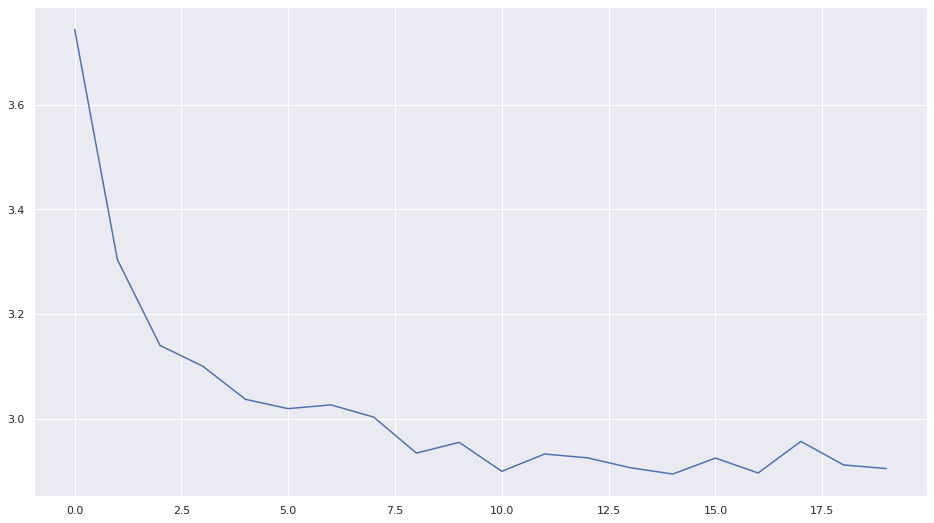

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(range(20), history)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def eval(model, testset):
    test_loader = DataLoader(testset, batch_size=64, shuffle=False)
    all_preds = []
    all_true = []
    for batch in tqdm(test_loader, desc='Test batch'):
        images, labels = batch
        images = images.flatten(start_dim=1)
        images = images.numpy()
        labels = labels.numpy()

        scores = model.forward(images)
        probs = model.softmax(scores)
        y_pred = np.argmax(probs, axis=1)
        all_preds.append(y_pred)
        all_true.append(labels)
    all_preds = np.concatenate(all_preds)
    all_true = np.concatenate(all_true)
    print(f'Accuracy score: {accuracy_score(all_true, all_preds):.2%}')
    print(classification_report(all_true, all_preds, target_names=trainset.classes))

In [ ]:
eval(model, testset)


Accuracy score: 35.63%
              precision    recall  f1-score   support

    airplane       0.45      0.32      0.38      1000
  automobile       0.41      0.51      0.46      1000
        bird       0.25      0.28      0.27      1000
         cat       0.35      0.09      0.14      1000
        deer       0.23      0.53      0.32      1000
         dog       1.00      0.00      0.00      1000
        frog       0.36      0.51      0.42      1000
       horse       0.43      0.42      0.43      1000
        ship       0.41      0.61      0.49      1000
       truck       0.53      0.29      0.37      1000

    accuracy                           0.36     10000
   macro avg       0.44      0.36      0.33     10000
weighted avg       0.44      0.36      0.33     10000

